# Football Match Prediction - Data Inspection

Dieses Notebook analysiert die Fußball-Match-Vorhersage Daten mit Fokus auf:

- **Data Overview**: Struktur und grundlegende Informationen
- **Feature Correlation**: Korrelationsmatrix der Features
- **ResultClass Distribution**: Verteilung der Zielvariable


## Setup and Data Loading


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from pathlib import Path
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Libraries imported successfully!
Analysis date: 2025-09-07 10:53:31


In [2]:
# Define data paths
data_dir = Path("data")

# Function to load pickle files safely
def load_pickle_file(filepath):
    """Load a pickle file and return the data with error handling."""
    try:
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
        print(f"✅ Successfully loaded: {filepath.name}")
        return data
    except Exception as e:
        print(f"❌ Error loading {filepath.name}: {str(e)}")
        return None

# Load main datasets
print("Loading datasets...")
print("=" * 50)

# Load the main prepared match dataframe
prepped_df_path = data_dir / "prepped_match_df.pck"
if prepped_df_path.exists():
    prepped_df = load_pickle_file(prepped_df_path)
else:
    print(f"❌ Main dataset not found at {prepped_df_path}")
    prepped_df = None

# Load market values dictionary
market_values_path = data_dir / "market_values_dict.pck"
if market_values_path.exists():
    market_values_dict = load_pickle_file(market_values_path)
else:
    print(f"❌ Market values not found at {market_values_path}")
    market_values_dict = None

# Load next matchday data
next_matchday_path = data_dir / "next_matchday_df.pck"
if next_matchday_path.exists():
    next_matchday_df = load_pickle_file(next_matchday_path)
else:
    print(f"❌ Next matchday data not found at {next_matchday_path}")
    next_matchday_df = None

print("=" * 50)
print("Data loading completed!")


Loading datasets...
✅ Successfully loaded: prepped_match_df.pck
✅ Successfully loaded: market_values_dict.pck
✅ Successfully loaded: next_matchday_df.pck
Data loading completed!


In [3]:
# Load yearly match data files for comprehensive analysis
yearly_data = {}
years = range(2005, 2026)  # Based on available files

print("Loading yearly match data...")
print("=" * 50)

for year in years:
    yearly_file = data_dir / f"match_df_{year}.pck"
    if yearly_file.exists():
        yearly_data[year] = load_pickle_file(yearly_file)
    else:
        print(f"⚠️  Missing data for year {year}")

print(f"\nLoaded data for {len(yearly_data)} years: {list(yearly_data.keys())}")
print("=" * 50)


Loading yearly match data...
✅ Successfully loaded: match_df_2005.pck
✅ Successfully loaded: match_df_2006.pck
✅ Successfully loaded: match_df_2007.pck
✅ Successfully loaded: match_df_2008.pck
✅ Successfully loaded: match_df_2009.pck
✅ Successfully loaded: match_df_2010.pck
✅ Successfully loaded: match_df_2011.pck
✅ Successfully loaded: match_df_2012.pck
✅ Successfully loaded: match_df_2013.pck
✅ Successfully loaded: match_df_2014.pck
✅ Successfully loaded: match_df_2015.pck
✅ Successfully loaded: match_df_2016.pck
✅ Successfully loaded: match_df_2017.pck
✅ Successfully loaded: match_df_2018.pck
✅ Successfully loaded: match_df_2019.pck
✅ Successfully loaded: match_df_2020.pck
✅ Successfully loaded: match_df_2021.pck
✅ Successfully loaded: match_df_2022.pck
✅ Successfully loaded: match_df_2023.pck
✅ Successfully loaded: match_df_2024.pck
✅ Successfully loaded: match_df_2025.pck

Loaded data for 21 years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018

## Data Overview


In [4]:
# Dataset overview function
def dataset_overview(df, dataset_name):
    """Provide comprehensive overview of a dataset."""
    print(f"\n{'='*60}")
    print(f"DATASET OVERVIEW: {dataset_name}")
    print(f"{'='*60}")
    
    if df is None:
        print("❌ Dataset is None - cannot analyze")
        return
    
    print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\n📋 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  • {dtype}: {count} columns")
    
    # Missing values
    missing_count = df.isnull().sum().sum()
    missing_percent = (missing_count / (df.shape[0] * df.shape[1])) * 100
    print(f"\n🔍 Missing Values: {missing_count:,} ({missing_percent:.2f}%)")
    
    # Duplicates
    duplicate_count = df.duplicated().sum()
    duplicate_percent = (duplicate_count / df.shape[0]) * 100
    print(f"🔄 Duplicate Rows: {duplicate_count:,} ({duplicate_percent:.2f}%)")
    
    return df

# Analyze main datasets
if prepped_df is not None:
    main_df = dataset_overview(prepped_df, "Prepared Match DataFrame")
else:
    main_df = None

if next_matchday_df is not None:
    next_df = dataset_overview(next_matchday_df, "Next Matchday DataFrame")
else:
    next_df = None



DATASET OVERVIEW: Prepared Match DataFrame
📊 Shape: 9,417 rows × 67 columns
💾 Memory usage: 5.35 MB

📋 Data Types:
  • float64: 62 columns
  • int64: 4 columns
  • object: 1 columns

🔍 Missing Values: 0 (0.00%)
🔄 Duplicate Rows: 0 (0.00%)

DATASET OVERVIEW: Next Matchday DataFrame
📊 Shape: 3 rows × 70 columns
💾 Memory usage: 0.00 MB

📋 Data Types:
  • float64: 62 columns
  • int64: 4 columns
  • object: 3 columns
  • datetime64[ns]: 1 columns

🔍 Missing Values: 0 (0.00%)
🔄 Duplicate Rows: 0 (0.00%)


In [5]:
# Analyze yearly data overview
if yearly_data:
    print(f"\n{'='*60}")
    print("YEARLY DATA OVERVIEW")
    print(f"{'='*60}")
    
    yearly_stats = []
    for year, df in yearly_data.items():
        if df is not None:
            stats = {
                'Year': year,
                'Matches': df.shape[0],
                'Columns': df.shape[1],
                'Missing_Values': df.isnull().sum().sum(),
                'Memory_MB': df.memory_usage(deep=True).sum() / 1024**2
            }
            yearly_stats.append(stats)
    
    yearly_summary = pd.DataFrame(yearly_stats)
    if not yearly_summary.empty:
        print(f"\n📈 Total matches across all years: {yearly_summary['Matches'].sum():,}")
        print(f"📅 Years covered: {yearly_summary['Year'].min()} - {yearly_summary['Year'].max()}")
        print(f"💾 Total memory usage: {yearly_summary['Memory_MB'].sum():.2f} MB")
        
        print(f"\n📊 Yearly Statistics Summary:")
        display(yearly_summary.set_index('Year'))



YEARLY DATA OVERVIEW

📈 Total matches across all years: 12,246
📅 Years covered: 2005 - 2025
💾 Total memory usage: 3.39 MB

📊 Yearly Statistics Summary:


,Matches,Columns,Missing_Values,Memory_MB
Year,,,,
2005,306,12,96,0.085306
2006,612,12,165,0.168930
2007,612,12,173,0.169384
2008,618,12,161,0.170959
2009,612,12,158,0.169352
2010,612,12,132,0.170259
2011,612,12,170,0.169611
2012,612,12,168,0.169384
2013,612,12,152,0.169643


In [7]:
# Display column information for main dataset
if main_df is not None:
    print(f"\n{'='*60}")
    print("COLUMN INFORMATION - Main Dataset")
    print(f"{'='*60}")
    
    # Create detailed column info, sorted by column name
    col_info = pd.DataFrame({
        'Data_Type': main_df.dtypes,
        'Non_Null_Count': main_df.count(),
        'Null_Count': main_df.isnull().sum(),
        'Null_Percentage': (main_df.isnull().sum() / len(main_df)) * 100,
        'Unique_Values': main_df.nunique(),
        'Sample_Value': [str(main_df[col].dropna().iloc[0]) if not main_df[col].dropna().empty else 'N/A' 
                        for col in main_df.columns]
    }, index=main_df.columns)
    
    # Sort by column name for alphabetical order
    col_info = col_info.sort_index()
    
    print(f"📋 Detailed Column Information (sorted by column):")
    display(col_info)
    
    # Identify potential target variables and features
    print(f"\n🎯 Potential Target Variables:")
    target_candidates = [col for col in main_df.columns if any(keyword in col.lower() 
                        for keyword in ['result', 'winner', 'outcome', 'target', 'label'])]
    if target_candidates:
        for target in target_candidates:
            print(f"  • {target}")
    else:
        print("  No obvious target variables found - manual inspection needed")



COLUMN INFORMATION - Main Dataset
📋 Detailed Column Information (sorted by column):


,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Sample_Value
matchDay,int64,9417,0,0.0,34,11
resultClass,object,9417,0,0.0,55,1:0
season,int64,9417,0,0.0,17,2009
teamAwayAvgGottenGoals1,float64,9417,0,0.0,9,2.0
teamAwayAvgGottenGoals10,float64,9417,0,0.0,33,2.4
teamAwayAvgGottenGoals2,float64,9417,0,0.0,13,3.0
teamAwayAvgGottenGoals3,float64,9417,0,0.0,16,2.3333333333333335
teamAwayAvgGottenGoals4,float64,9417,0,0.0,20,2.5
teamAwayAvgGottenGoals5,float64,9417,0,0.0,22,2.4
teamAwayAvgGottenGoals6,float64,9417,0,0.0,25,2.5



🎯 Potential Target Variables:
  • resultClass


## Feature Correlation Matrix


🔍 Erstelle Korrelationsmatrix für numerische Features...
📊 Gefundene numerische Features: 66
⚠️  Viele Features (66) - zeige Top-Korrelationen


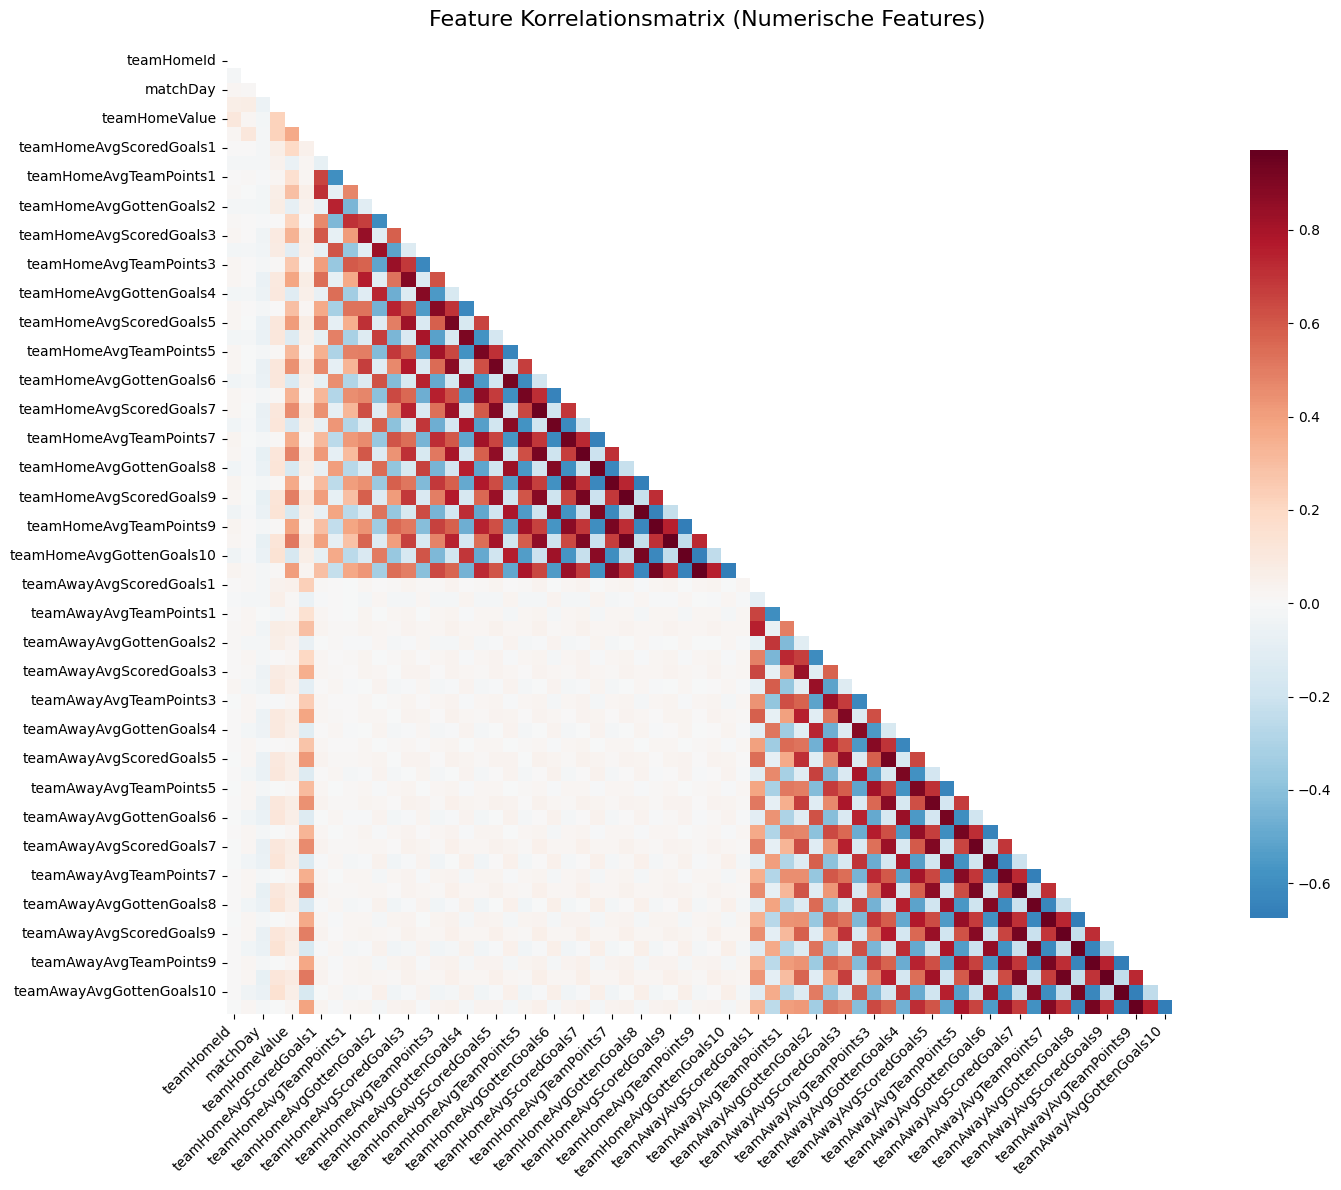


🔥 Stärkste Korrelationen (|r| > 0.5):


,Feature_1,Feature_2,Correlation
473,teamAwayAvgScoredGoals9,teamAwayAvgScoredGoals10,0.971634
232,teamHomeAvgScoredGoals9,teamHomeAvgScoredGoals10,0.970479
457,teamAwayAvgScoredGoals8,teamAwayAvgScoredGoals9,0.966391
239,teamHomeAvgTeamPoints9,teamHomeAvgTeamPoints10,0.966208
216,teamHomeAvgScoredGoals8,teamHomeAvgScoredGoals9,0.966113
480,teamAwayAvgTeamPoints9,teamAwayAvgTeamPoints10,0.966093
476,teamAwayAvgGottenGoals9,teamAwayAvgGottenGoals10,0.962051
468,teamAwayAvgTeamPoints8,teamAwayAvgTeamPoints9,0.960948
235,teamHomeAvgGottenGoals9,teamHomeAvgGottenGoals10,0.960936
434,teamAwayAvgScoredGoals7,teamAwayAvgScoredGoals8,0.960780


In [8]:
# Correlation Matrix für numerische Features
if main_df is not None:
    print("🔍 Erstelle Korrelationsmatrix für numerische Features...")
    
    # Nur numerische Spalten auswählen
    numeric_cols = main_df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"📊 Gefundene numerische Features: {len(numeric_cols)}")
    
    if len(numeric_cols) > 1:
        # Korrelationsmatrix berechnen
        correlation_matrix = main_df[numeric_cols].corr()
        
        # Große Korrelationsmatrix - zeige nur die wichtigsten Korrelationen
        if len(numeric_cols) > 20:
            print(f"⚠️  Viele Features ({len(numeric_cols)}) - zeige Top-Korrelationen")
            
            # Erstelle eine Heatmap mit den stärksten Korrelationen
            plt.figure(figsize=(15, 12))
            
            # Maske für die obere Dreiecksmatrix
            mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
            
            # Heatmap erstellen
            sns.heatmap(correlation_matrix, 
                       mask=mask,
                       annot=False,  # Keine Werte anzeigen bei vielen Features
                       cmap='RdBu_r',
                       center=0,
                       square=True,
                       fmt='.2f',
                       cbar_kws={"shrink": .8})
            
            plt.title('Feature Korrelationsmatrix (Numerische Features)', fontsize=16, pad=20)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
            
            # Zeige die stärksten Korrelationen (> 0.5 oder < -0.5)
            print(f"\n🔥 Stärkste Korrelationen (|r| > 0.5):")
            strong_corr = []
            for i in range(len(correlation_matrix.columns)):
                for j in range(i+1, len(correlation_matrix.columns)):
                    corr_val = correlation_matrix.iloc[i, j]
                    if abs(corr_val) > 0.5:
                        strong_corr.append({
                            'Feature_1': correlation_matrix.columns[i],
                            'Feature_2': correlation_matrix.columns[j],
                            'Correlation': corr_val
                        })
            
            if strong_corr:
                strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
                display(strong_corr_df.head(20))  # Top 20 stärkste Korrelationen
            else:
                print("Keine starken Korrelationen (|r| > 0.5) gefunden.")
                
        else:
            # Kleinere Matrix - zeige alle Korrelationen mit Werten
            plt.figure(figsize=(12, 10))
            sns.heatmap(correlation_matrix, 
                       annot=True,
                       cmap='RdBu_r',
                       center=0,
                       square=True,
                       fmt='.2f',
                       cbar_kws={"shrink": .8})
            
            plt.title('Feature Korrelationsmatrix', fontsize=16, pad=20)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
    
    else:
        print("❌ Nicht genügend numerische Features für Korrelationsanalyse gefunden.")
else:
    print("❌ Hauptdatensatz nicht verfügbar.")


🎯 Analysiere ResultClass Verteilung...
📋 Gefundene Result/Class Spalten: ['resultClass']

ANALYSE: resultClass
📊 Anzahl einzigartiger Werte: 55
🔍 Fehlende Werte: 0

📈 Verteilung:


,Anzahl,Prozent
resultClass,,
1:1,1139,12.10
2:1,821,8.72
1:0,742,7.88
2:0,644,6.84
0:0,637,6.76
1:2,612,6.50
0:1,588,6.24
2:2,547,5.81
3:1,456,4.84


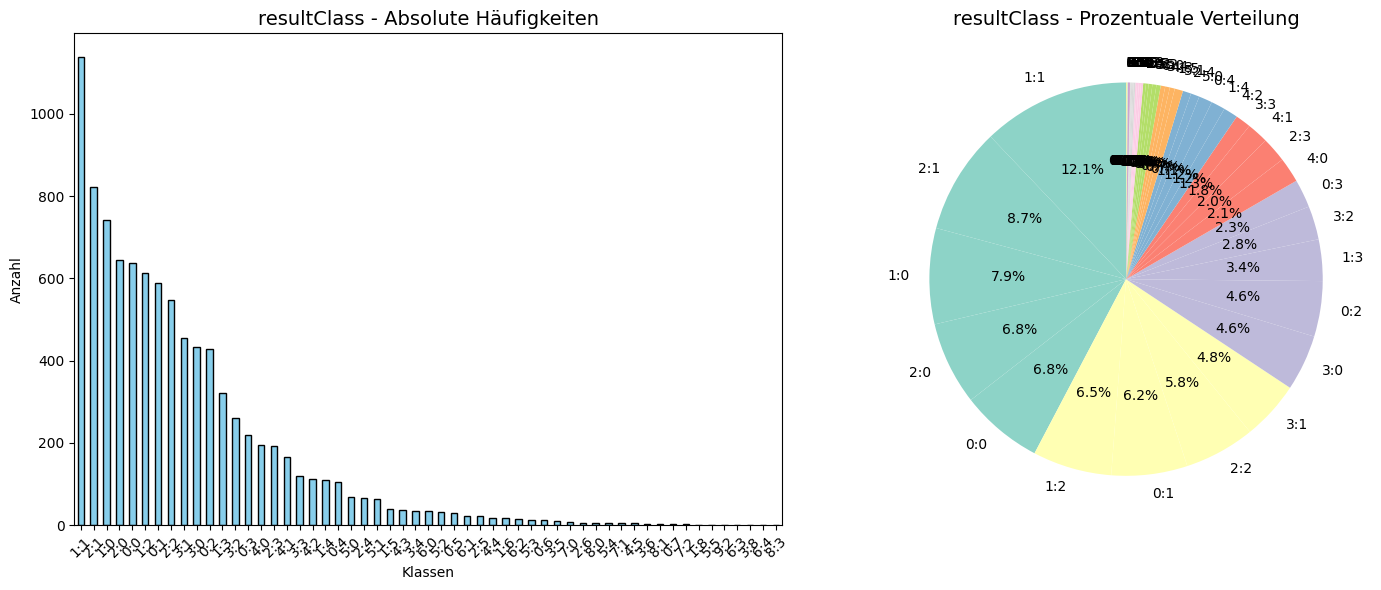

In [9]:
# Analyse der ResultClass Verteilung
if main_df is not None:
    print("🎯 Analysiere ResultClass Verteilung...")
    
    # Suche nach ResultClass Spalte
    result_cols = [col for col in main_df.columns if 'result' in col.lower() or 'class' in col.lower()]
    
    if result_cols:
        print(f"📋 Gefundene Result/Class Spalten: {result_cols}")
        
        for col in result_cols:
            print(f"\n{'='*50}")
            print(f"ANALYSE: {col}")
            print(f"{'='*50}")
            
            # Grundlegende Statistiken
            value_counts = main_df[col].value_counts()
            value_props = main_df[col].value_counts(normalize=True) * 100
            
            print(f"📊 Anzahl einzigartiger Werte: {main_df[col].nunique()}")
            print(f"🔍 Fehlende Werte: {main_df[col].isnull().sum()}")
            
            print(f"\n📈 Verteilung:")
            result_summary = pd.DataFrame({
                'Anzahl': value_counts,
                'Prozent': value_props.round(2)
            })
            display(result_summary)
            
            # Visualisierung
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Balkendiagramm
            value_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
            ax1.set_title(f'{col} - Absolute Häufigkeiten', fontsize=14)
            ax1.set_xlabel('Klassen')
            ax1.set_ylabel('Anzahl')
            ax1.tick_params(axis='x', rotation=45)
            
            # Kreisdiagramm
            colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
            wedges, texts, autotexts = ax2.pie(value_counts.values, 
                                             labels=value_counts.index,
                                             autopct='%1.1f%%',
                                             colors=colors,
                                             startangle=90)
            ax2.set_title(f'{col} - Prozentuale Verteilung', fontsize=14)
            
            plt.tight_layout()
            plt.show()
            
            # Balancecheck für binäre/ternäre Klassifikation
            if main_df[col].nunique() <= 3:
                print(f"\n⚖️  Balance-Check:")
                min_class_pct = value_props.min()
                max_class_pct = value_props.max()
                balance_ratio = min_class_pct / max_class_pct
                
                if balance_ratio < 0.1:
                    print(f"❌ Stark unbalanciert (Ratio: {balance_ratio:.3f}) - Minority Class: {min_class_pct:.1f}%")
                elif balance_ratio < 0.3:
                    print(f"⚠️  Mäßig unbalanciert (Ratio: {balance_ratio:.3f}) - Minority Class: {min_class_pct:.1f}%")
                else:
                    print(f"✅ Gut balanciert (Ratio: {balance_ratio:.3f}) - Minority Class: {min_class_pct:.1f}%")
    
    else:
        print("❌ Keine ResultClass oder ähnliche Spalte gefunden.")
        print("🔍 Verfügbare Spalten:")
        for i, col in enumerate(main_df.columns):
            print(f"  {i+1:2d}. {col}")
            
        # Versuche andere potentielle Zielvariablen zu finden
        potential_targets = [col for col in main_df.columns if any(keyword in col.lower() 
                           for keyword in ['target', 'label', 'outcome', 'winner', 'score'])]
        if potential_targets:
            print(f"\n🎯 Potentielle Zielvariablen gefunden: {potential_targets}")
            
else:
    print("❌ Hauptdatensatz nicht verfügbar.")


## ResultClass Distribution
